# Intergrated Project 

## Description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

In [41]:
import pandas
import pandas as pd
import numpy as np
import plotly.express as px
import math as mt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from math import factorial
from functools import reduce

In [42]:
# Load the data files into different DataFrames
def file_path(x):
    y = pd.read_csv(x)
    return y

In [43]:
data = file_path(r"C:\Users\kevin\datasets\moved_games.csv")
data.info()
data.head(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


# Data Preperation 

In [44]:
data.rename(columns= {col: col.lower() for col in data.columns}, inplace=True)
print(data.columns)



Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [45]:
# % of missing values
pd.DataFrame(data.isna().mean()*100).sort_values(by=0)[::-1].style.background_gradient('coolwarm')

,0
critic_score,51.319174
rating,40.478612
user_score,40.089740
year_of_release,1.609333
genre,0.011965
name,0.011965
other_sales,0.000000
jp_sales,0.000000
eu_sales,0.000000
na_sales,0.000000


In [46]:
data['user_score'].replace("tbd", np.nan, inplace=True)
# There were 2-3 cells in the database that had a string value in them. I replaced this with NaN values since there is no score to begin with 
data['year_of_release'] = data['year_of_release'].fillna(-1)
data['critic_score'] = data['critic_score'].fillna(-1)
data['user_score'] = data['user_score'].fillna(-1)

data['rating'] = data['rating'].fillna('N/A')
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,N/A
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,N/A
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,N/A
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,N/A


-1 means N/A
Missing values in the critic and user scores are represented with 0. Median or mean would not be a good way to represent this data. We want to make sure we are giving accurate scores and year of release. 
Adding a score that is far greater or far less than the original score would inaccurately describe how good the video game actually is. 

In [47]:
# Convert the 'release_year' column to an integer
data["year_of_release"] = data["year_of_release"].astype(int)
# Convert the 'critic_score' and 'user_score' columns to floats
data["critic_score"] = data["critic_score"].astype(int)
data["user_score"] = data["user_score"].astype(float)


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int32  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int32  
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(5), int32(2), object(4)
memory usage: 1.3+ MB


In [49]:
video_games_df = data.assign(total_sales=data[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1))
video_games_df.head(20)


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,N/A,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,N/A,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1,-1.0,N/A,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1,-1.0,N/A,28.31


In [50]:
data.duplicated().sum()

0

# Data Analysis

Text(0, 0.5, 'Total Sales')

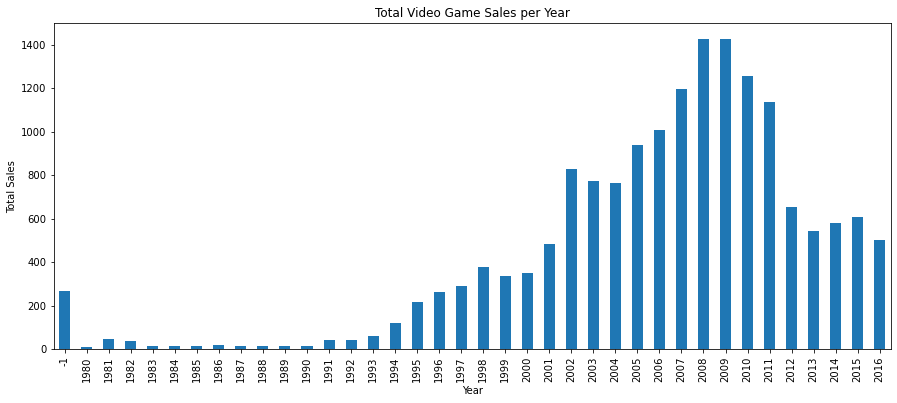

In [52]:
game_counts = data.groupby("year_of_release").size()
game_counts.plot(kind="bar", figsize=(15,6))

plt.title('Total Video Game Sales per Year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

How do you think the missing values could occur?

The missing values most likely occured due to incomplete data entry, equipment malfunctions, lost files, and many other reasons.

This graph is representing video game sales by year. 
Between the years 2006-2011 it seems to be the largest increase of video game releases. 
Video game releases didn't start picking up until the early 90s

In [53]:
platform_sales = video_games_df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales
# Table for all platform sales 

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       30.77
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Text(0, 0.5, 'Total Sales')

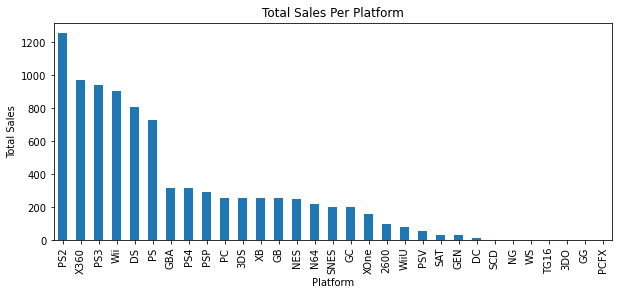

In [54]:
platform_sales.plot(kind='bar', figsize=(10,4))

plt.title('Total Sales Per Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')

Sony has had the more successful game systems based on sales (Playstation).
Nintendos most successful system was the Wii.
Microsoft Xbox360 has the most sales based on sales.
The Playstation 2 still has more sales than the Playstation 3. Showing it's popularity even being much older compared to other systems.

  platform  total_sales
0      PS2      1255.77
1     X360       971.42
2      PS3       939.65
3      Wii       907.51
4       DS       806.12


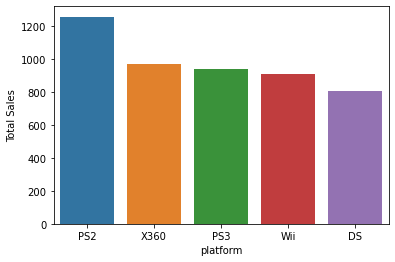

In [55]:
top_five_sales = platform_sales.head(5).reset_index()

print(top_five_sales)

sns.barplot(x="platform", y="total_sales", data=top_five_sales)
plt.ylabel('Total Sales')
plt.show()


2 Sony products (PS2 and PS3), 1 Microsoft (Xbox360), 2 Nintendo (Wii and DS)

Bar graph represents the top 5 platforms sales throughout the years 1985-2016.
As the research states, sales did not start until 2000, and peaked right in the middle during 2008. 
Sales started decreasing in 2009 and saw their biggest drop of sales during the period of 2012 - 2016. 
The PS4 and Xbox One were released in 2013. These drop in sales could be from systems being out dated and players burnt out

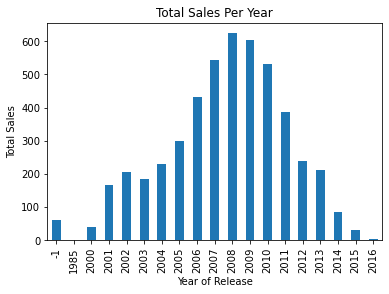

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS'], dtype='object', name='platform')
year_of_release
-1        60.37
 1985      0.02
 2000     39.17
 2001    166.43
 2002    205.38
 2003    184.31
 2004    229.08
 2005    299.05
 2006    432.96
 2007    544.30
 2008    624.31
 2009    604.13
 2010    530.81
 2011    386.90
 2012    239.82
 2013    211.96
 2014     86.25
 2015     29.92
 2016      5.30
Name: total_sales, dtype: float64


In [56]:
top_n_platforms = platform_sales.head(5).index

top_n_data = video_games_df[video_games_df['platform'].isin(top_n_platforms)]

grouped_top_n_data = top_n_data.groupby('year_of_release')

sales_by_year = grouped_top_n_data['total_sales'].sum()

sales_by_year.plot.bar()
plt.title('Total Sales Per Year')
plt.xlabel('Year of Release')
plt.ylabel('Total Sales')

plt.show()
plt.show()

print(top_n_platforms)
print(sales_by_year)

To look at popularity of system sales and their sales I have decided to cut down the data into the 3 more popular companies. 
Also decided to look at and compare the data for at-home devices instead of handheld devices like the Playstation Portable and Gameboy Advanced. Although, handheld devices will not be completely ignored and be compared later in the analysis. Sony for Playstation, Microsoft for Xbox, and Nintendo for their Wii and other electronics. 

    platform  year_of_release  total_sales
0       2600               -1        10.50
1       2600             1980        11.38
2       2600             1981        35.68
3       2600             1982        28.88
4       2600             1983         5.84
..       ...              ...          ...
249       XB             2008         0.18
250     XOne             2013        18.96
251     XOne             2014        54.07
252     XOne             2015        60.14
253     XOne             2016        26.15

[254 rows x 3 columns]


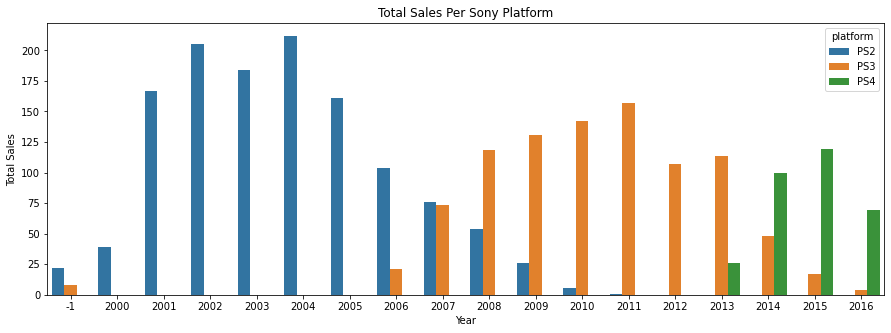

In [57]:
popularity_df = video_games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()

print(popularity_df)

platform_ps2 = popularity_df[popularity_df['platform'] == 'PS2']

platform_ps3 = popularity_df[popularity_df['platform'] == 'PS3']

platform_ps4= popularity_df[popularity_df['platform'] == 'PS4']

handheld_df = pd.concat([platform_ps2, platform_ps3, platform_ps4], axis=0)

plt.figure(figsize=(15, 5))

sns.barplot(data=handheld_df, #dataset
             x='year_of_release', #variable along the x-axis
             y='total_sales', #variable along the y-axis (usually the thing you are actually measuring)
            hue = 'platform' #the variable you want to group data by to compare (ex. gender, country, plan)
        
           )


plt.title('Total Sales Per Sony Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.show()

Based on the Playstation systens, the PS2 was a very popular system. This could be due to being one of the first systems with graphical enhancements, and at the time Sony being the FIRST company releasing a new generation console. We can see how the release of 2006, continued to increase video game sales substantially. 2012 most liely dropped off due to the expected release of PS3 in 2013. We start to see the major drop off in 2014. This indicates more users possibly moving on to a new genration of systems. 

Text(0, 0.5, 'Total Sales')

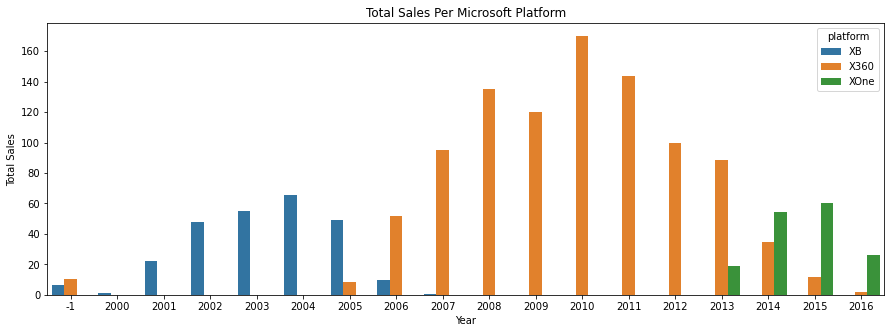

In [58]:
XB_sales = popularity_df[popularity_df['platform'] == 'XB']

X360_sales = popularity_df[popularity_df['platform'] == 'X360']

XOne_sales = popularity_df[popularity_df['platform'] == 'XOne']

handheld_df = pd.concat([XB_sales, X360_sales, XOne_sales], axis=0)

plt.figure(figsize=(15, 5))

sns.barplot(data=handheld_df, #dataset
             x='year_of_release', #variable along the x-axis
             y='total_sales', #variable along the y-axis (usually the thing you are actually measuring)
            hue = 'platform' #the variable you want to group data by to compare (ex. gender, country, plan)
        
           )


plt.title('Total Sales Per Microsoft Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')

Microsoft was not able to compete with Sony's systems until the release of the Xbox360. If you compare the PS2 to the Xbox, Playstaion's beat Xbox sales substantionally. Although, with the release of the Xbox360, Microsoft was able to compete based on numbers. This really showed Sony the competition they are now having to face. Unfortunately, when both the PS2 and Xbox360 died out, Sony took a lead again with the release of PS4. 

Text(0, 0.5, 'Total Sales')

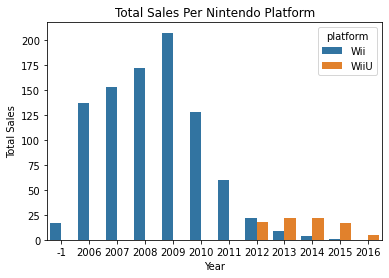

In [59]:
Wii_sales = popularity_df[popularity_df['platform'] == 'Wii']

Wii_U_sales = popularity_df[popularity_df['platform'] == 'WiiU']

handheld_df = pd.concat([Wii_sales, Wii_U_sales], axis=0) 

sns.barplot(data=handheld_df, #dataset
             x='year_of_release', #variable along the x-axis
             y='total_sales', #variable along the y-axis (usually the thing you are actually measuring)
            hue = 'platform' #the variable you want to group data by to compare (ex. gender, country, plan)
        
           )


plt.title('Total Sales Per Nintendo Platform')
plt.xlabel('Year')
plt.ylabel('Total Sales')





Nintendo, and their Wii consoles did great at the beggining when the first console was released. We see how quickly Nintendo's at home consoles dropped off in sales. Even when they introduced the Wii_U. the worst amount of sales compared to the rest of the systems showed in the bar graphs. I would say based on sales, the Wii was a great product, and the Wii U did not live out to expectations Nintendo fans were hoping for. 

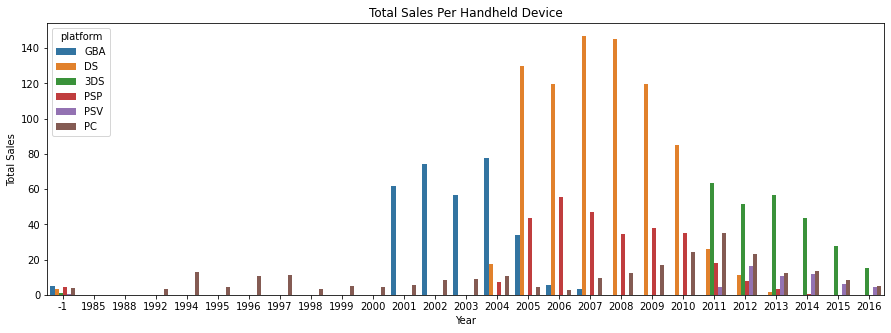

In [60]:
popularity_df = video_games_df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()


nin_ds = popularity_df[popularity_df['platform'] == 'DS']

nin_gba = popularity_df[popularity_df['platform'] == 'GBA']

nin_3ds = popularity_df[popularity_df['platform'] == '3DS']

ps_psp = popularity_df[popularity_df['platform'] == 'PSP']

ps_pv  = popularity_df[popularity_df['platform'] == 'PSV']

ps_pc  = popularity_df[popularity_df['platform'] == 'PC']

handheld_df = pd.concat([nin_gba,nin_ds, nin_3ds, ps_psp, ps_pv,ps_pc], axis=0)

plt.figure(figsize=(15, 5))

sns.barplot(data=handheld_df, #dataset
             x='year_of_release', #variable along the x-axis
             y='total_sales', #variable along the y-axis (usually the thing you are actually measuring)
            hue = 'platform' #the variable you want to group data by to compare (ex. gender, country, plan)
        
           )


plt.title('Total Sales Per Handheld Device')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.show()

We can see how Ninendo's devices competed with portatable devices like the PSP and PSV. Nintendo seems to dominate the portable device market when it comes to video games. Sony has yet to release another portable device since the Playstation Vita and Microsoft has never created one to begin with. 

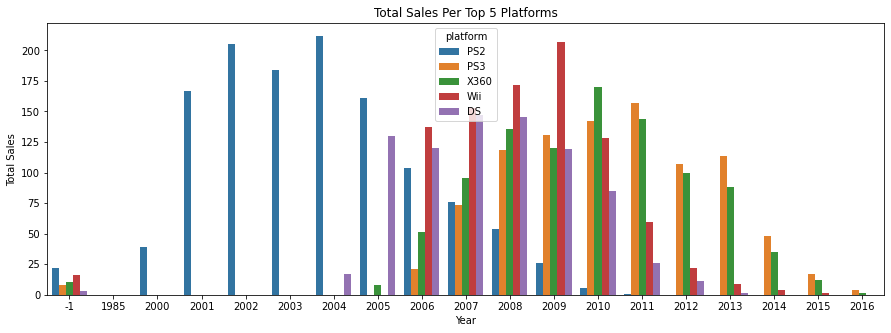

In [61]:
video_game_consoles = pd.concat([platform_ps2,platform_ps3,X360_sales,Wii_sales,nin_ds], axis=0)


plt.figure(figsize=(15, 5))
sns.barplot(data=video_game_consoles, 
             x='year_of_release', 
             y='total_sales', 
            hue = 'platform' 
        
           )

plt.title('Total Sales Per Top 5 Platforms')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.show()

Graphical representation on how the top 5 platforms with sales compared to one another. We can see how Playstation has dominated the industry with their platforms since the start of the 2000s. Real competition did not introduce itself until the mid 2000s. 

# Analysis of Data Relevant to the 2017 Campaign

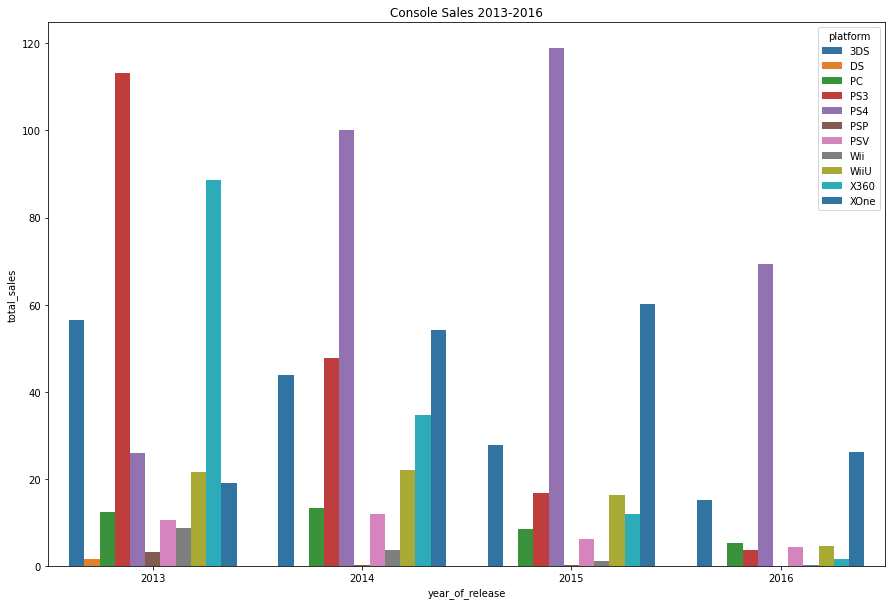

In [62]:
video_games_df_relevant = popularity_df.loc[( popularity_df['year_of_release'] >= 2013) & (popularity_df['year_of_release'] <= 2016)]

plt.figure(figsize=(15, 10))
plt.title('Console Sales 2013-2016')
plt.ylabel('Year')
plt.xlabel('Total Sales')

sns.barplot(data=video_games_df_relevant, x='year_of_release', y='total_sales', hue='platform',
            palette=["C0", 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11'])


plt.show()

The lifespan of a lot of the consoles are ranging from 8-10 years.

The graph displays data from 2013 to 2016. This happens to be the most relevant data we have right now to estimate how 2017 is suppose to look like. We see older platforms dying down, and newer platforms starting to become popular within this period. 

                                name platform  year_of_release         genre  \
16                Grand Theft Auto V      PS3             2013        Action   
23                Grand Theft Auto V     X360             2013        Action   
31         Call of Duty: Black Ops 3      PS4             2015       Shooter   
33               Pokemon X/Pokemon Y      3DS             2013  Role-Playing   
42                Grand Theft Auto V      PS4             2014        Action   
...                              ...      ...              ...           ...   
16703               Strawberry Nauts      PSV             2016     Adventure   
16707               Aiyoku no Eustia      PSV             2014          Misc   
16710  Samurai Warriors: Sanada Maru      PS3             2016        Action   
16712        Haitaka no Psychedelica      PSV             2016     Adventure   
16714            Winning Post 8 2016      PSV             2016    Simulation   

       na_sales  eu_sales  jp_sales  ot

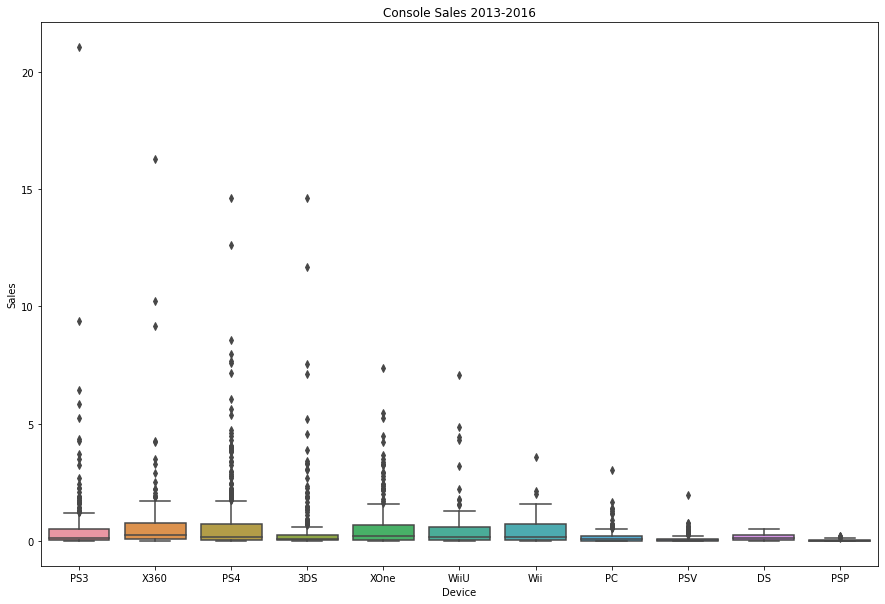

In [63]:
time_period_slice = (video_games_df['year_of_release'] >= 2013) & (video_games_df['year_of_release'] <= 2016)
video_games_df_relevant = video_games_df[time_period_slice]
print(video_games_df_relevant)

# Create a boxplot to display the distribution of sales for each platform
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales',data=video_games_df_relevant)
plt.title('Console Sales 2013-2016')
plt.xlabel('Device')
plt.ylabel('Sales')
plt.show()


Outliers tell us that there are some games within the specified time period that have significantly higher or lower total sales than the majority of the games on the same platform. This could indicate that there were some games within the specified time period that performed exceptionally well or poorly, compared to others

In [64]:
video_games_df_relevant[video_games_df_relevant['platform']=='PS4']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,N/A,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1,-1.0,N/A,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16500,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69,7.5,N/A,0.01
16503,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,N/A,0.01
16526,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61,7.9,T,0.01
16530,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51,5.5,M,0.01


In [65]:
video_games_df_relevant[video_games_df_relevant['platform']=='XOne']


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,-1,-1.0,N/A,7.39
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97,7.9,M,5.47
179,Call of Duty: Advanced Warfare,XOne,2014,Shooter,3.22,1.55,0.01,0.48,81,5.4,M,5.26
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88,6.2,M,4.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16630,Sébastien Loeb Rally Evo,XOne,2016,Racing,0.00,0.01,0.00,0.00,63,8.2,E,0.01
16643,Rugby Challenge 3,XOne,2016,Sports,0.00,0.01,0.00,0.00,-1,6.6,E,0.01
16645,ZombiU,XOne,2016,Action,0.00,0.01,0.00,0.00,-1,-1.0,N/A,0.01
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.00,0.00,74,6.7,N/A,0.01


In [66]:
video_games_df_relevant[video_games_df_relevant['platform']=='3DS']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,N/A,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,-1,-1.0,N/A,11.68
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,-1,-1.0,N/A,7.55
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,-1,-1.0,N/A,7.14
184,Tomodachi Life,3DS,2013,Simulation,0.97,2.11,1.90,0.24,-1,-1.0,N/A,5.22
...,...,...,...,...,...,...,...,...,...,...,...,...
16608,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,0.00,0.00,0.01,0.00,-1,-1.0,N/A,0.01
16610,Kiniro no Corda 3,3DS,2015,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,N/A,0.01
16648,Mushi Bugyou,3DS,2013,Action,0.00,0.00,0.01,0.00,-1,-1.0,N/A,0.01
16668,Fujiko F. Fujio Characters: Great Assembly! Sl...,3DS,2014,Action,0.00,0.00,0.01,0.00,-1,-1.0,N/A,0.01


Text(0, 0.5, 'Sales')

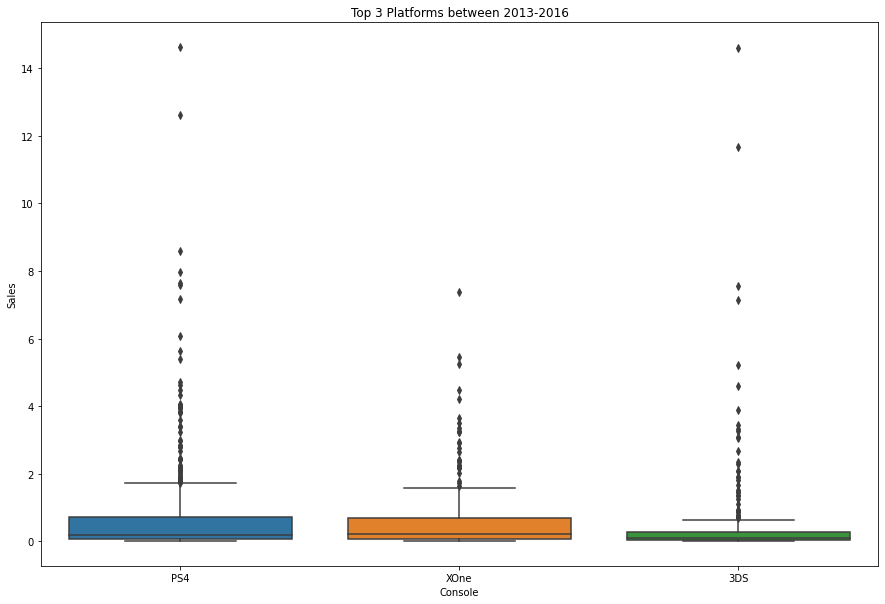

In [67]:
video_games_df_relevant.reset_index()
plt.figure(figsize=(15, 10))
sns.boxplot(x='platform', y='total_sales',data=video_games_df_relevant,order=['PS4','XOne','3DS'])
plt.title('Top 3 Platforms between 2013-2016')
plt.xlabel('Console')
plt.ylabel('Sales')

Above we see how the PS4, Xbox One, and 3DS is compared based on video games. 

These platforms are still growing since the only data we have relevant is between 2013(release year) and 2016. 

We also see how the median, upper and lower quartile are low. There are plenty of outliers in these platforms, but they have only been around for 3-4 years so far. 

Text(0.5, 1.0, 'Average Sales Globally')

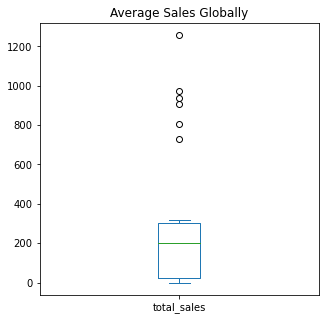

In [68]:
average_sales = video_games_df.groupby('platform')['total_sales'].sum()
average_sales.plot(kind='box', figsize=(5,5))

plt.title('Average Sales Globally')


Total sales globally represented by a box plot. The outsiders being within the top 5 consoleS 

In [69]:
average_sales = video_games_df.groupby('platform')['total_sales'].mean()
print(average_sales)
print()
average_sales_relevance = video_games_df_relevant.groupby('platform')['total_sales'].mean()
print(average_sales_relevance)

platform
2600    0.729173
3DO     0.033333
3DS     0.498077
DC      0.306731
DS      0.374765
GB      2.606735
GBA     0.386679
GC      0.357788
GEN     1.061034
GG      0.040000
N64     0.685517
NES     2.561735
NG      0.120000
PC      0.266448
PCFX    0.030000
PS      0.610576
PS2     0.581106
PS3     0.705973
PS4     0.801378
PSP     0.243218
PSV     0.125744
SAT     0.194162
SCD     0.310000
SNES    0.836987
TG16    0.080000
WS      0.236667
Wii     0.687508
WiiU    0.559116
X360    0.769746
XB      0.312791
XOne    0.645020
Name: total_sales, dtype: float64

platform
3DS     0.472772
DS      0.192500
PC      0.208624
PS3     0.525884
PS4     0.801378
PSP     0.052239
PSV     0.092151
Wii     0.593913
WiiU    0.562000
X360    0.735484
XOne    0.645020
Name: total_sales, dtype: float64


Average sales for 1985-2016 and relevant data 2013-2016

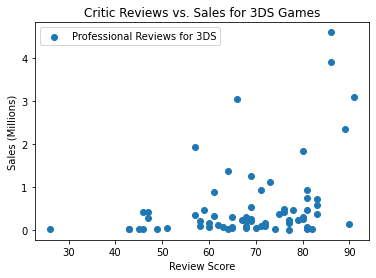

0.3570566142288098


In [70]:
platform_df= video_games_df_relevant[video_games_df_relevant['platform'] == '3DS']
platform_df = platform_df[platform_df['critic_score'] != -1]
# Create a scatter plot of the user and professional reviews vs. sales
plt.scatter(platform_df['critic_score'], platform_df['total_sales'])

# Add a legend
plt.legend(['Professional Reviews for 3DS'])

# Add axis labels and a title
plt.xlabel('Review Score')
plt.ylabel('Sales (Millions)')
plt.title('Critic Reviews vs. Sales for 3DS Games')

# Show the plot
plt.show()
r = platform_df.corr()['critic_score']['total_sales']
print(r)


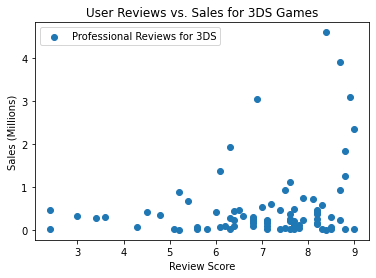

0.24150411773562974


In [71]:
platform_df= video_games_df_relevant[video_games_df_relevant['platform'] == '3DS']
platform_df = platform_df[platform_df['user_score'] != -1]
# Create a scatter plot of the user and professional reviews vs. sales
plt.scatter(platform_df['user_score'], platform_df['total_sales'])

# Add a legend
plt.legend(['Professional Reviews for 3DS'])

# Add axis labels and a title
plt.xlabel('Review Score')
plt.ylabel('Sales (Millions)')
plt.title('User Reviews vs. Sales for 3DS Games')

# Show the plot
plt.show()
r = platform_df.corr()['user_score']['total_sales']
print(r)

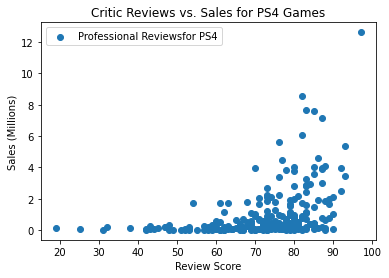

0.40656790206178123


In [72]:
# Select the data for the platform you want to analyze
platform_df = video_games_df_relevant[video_games_df_relevant['platform'] == 'PS4']
platform_df = platform_df[platform_df['critic_score'] != -1]
# Create a scatter plot of the user and professional reviews vs. sales
plt.scatter(platform_df['critic_score'], platform_df['total_sales'])

# Add a legend
plt.legend(['Professional Reviewsfor PS4'])

# Add axis labels and a title
plt.xlabel('Review Score')
plt.ylabel('Sales (Millions)')
plt.title('Critic Reviews vs. Sales for PS4 Games')

# Show the plot
plt.show()
r = platform_df.corr()['critic_score']['total_sales']
print(r)


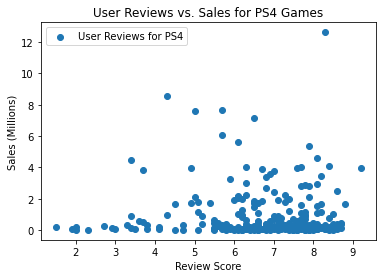

-0.03195711020455685


In [73]:
platform_df= video_games_df_relevant[video_games_df_relevant['platform'] == 'PS4']
platform_df = platform_df[platform_df['user_score'] != -1]
# Create a scatter plot of the user and professional reviews vs. sales
plt.scatter(platform_df['user_score'], platform_df['total_sales'])

# Add a legend
plt.legend(['User Reviews for PS4'])

# Add axis labels and a title
plt.xlabel('Review Score')
plt.ylabel('Sales (Millions)')
plt.title('User Reviews vs. Sales for PS4 Games')

# Show the plot
plt.show()
r = platform_df.corr()['user_score']['total_sales']
print(r)

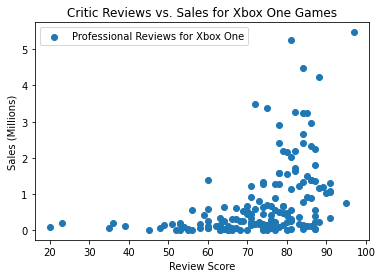

0.4169983280084021


In [74]:
platform_df= video_games_df_relevant[video_games_df_relevant['platform'] == 'XOne']
platform_df = platform_df[platform_df['critic_score'] != -1]
# Create a scatter plot of the user and professional reviews vs. sales
plt.scatter(platform_df['critic_score'], platform_df['total_sales'])

# Add a legend
plt.legend(['Professional Reviews for Xbox One'])

# Add axis labels and a title
plt.xlabel('Review Score')
plt.ylabel('Sales (Millions)')
plt.title('Critic Reviews vs. Sales for Xbox One Games')

# Show the plot
plt.show()
r = platform_df.corr()['critic_score']['total_sales']
print(r)


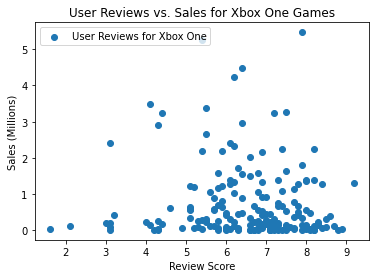

-0.06892505328279543


In [75]:
platform_df= video_games_df_relevant[video_games_df_relevant['platform'] == 'XOne']
platform_df = platform_df[platform_df['user_score'] != -1]
# Create a scatter plot of the user and professional reviews vs. sales
plt.scatter(platform_df['user_score'], platform_df['total_sales'])

# Add a legend
plt.legend(['User Reviews for Xbox One'])

# Add axis labels and a title
plt.xlabel('Review Score')
plt.ylabel('Sales (Millions)')
plt.title('User Reviews vs. Sales for Xbox One Games')

# Show the plot
plt.show()
r = platform_df.corr()['user_score']['total_sales']
print(r)


A positive correlation coefficient means that as one variable increases, the other variable also tends to increase, and a negative correlation coefficient means that as one variable increases, the other variable tends to decrease. The strength of the correlation is indicated by the magnitude of the coefficient: the closer it is to -1 or 1, the stronger the correlation.

We can see that critic reviews have a much stronger correlation compared to user reviews. 
The only time we see a negative correlation is user reviews with the PS4 and Xbox One. 

We can see that over the course of the score, there is more of a chance for sales to increase when the game is scored better than others by critics. This could be because when a video game is known to be really good by professional reviews. The video game becomes more exposed to other people through media and word of mouth. 

I believe the games that had a decent or better score than most possibly didn't increase in sales compared to others because of there are so many video games that it was more difficult for those games to compete with one another. I've included a Critic Score scatter chart to show how scores with average scores were still able to have good sales. This is possible because of how mass media has expanding through computers, television, and smart-phones. 

For 2017 and ownward, this could have more of an affect with the PS4, Xbox One, and 3DS since social media has grown so much since 2016. 

Action          766
Role-Playing    292
Adventure       245
Sports          214
Shooter         187
Misc            155
Racing           85
Fighting         80
Platform         74
Simulation       62
Strategy         56
Puzzle           17
Name: genre, dtype: int64


<AxesSubplot:title={'center':'Total Sales by Genre'}, ylabel='Total Sales'>

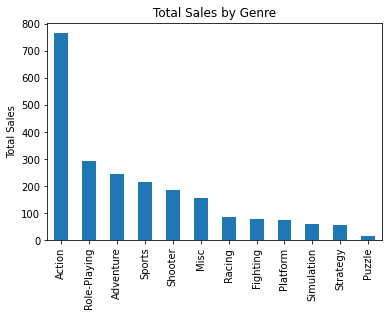

In [76]:
genre_counts = video_games_df_relevant['genre'].value_counts()
print(genre_counts)
genre_counts.plot(kind='bar',ylabel='Total Sales',title='Total Sales by Genre')

In [77]:
genre_counts = video_games_df_relevant['genre'].value_counts()

total_sales_by_genre = video_games_df_relevant.groupby('genre')['total_sales'].sum()

sales_per_game_unit = total_sales_by_genre / genre_counts

print(sales_per_game_unit.sort_values(ascending=False))


# COuld also use average_sales_by_genre = video_games_df.groupby('genre')['total_sales'].mean()



Shooter         1.245882
Sports          0.703972
Platform        0.576081
Role-Playing    0.499623
Racing          0.469294
Fighting        0.441375
Action          0.420196
Misc            0.405290
Simulation      0.350968
Puzzle          0.186471
Strategy        0.180000
Adventure       0.096490
dtype: float64


We can see even though Action has the most sales, "Shooter" still has the highest sale per unit. I believe the reason for this is because the wide popularity of games like Overwatch, Call of Duty, BattleField, and more.

If we were to look at the other genres, it looks like Sports, Role-Playing, Racing, and Platform make up the rest of the top 5 for sale per unit. This goes more hand and hand with what console games today deliver to their players. 

In [78]:
sales_by_game_and_platform = video_games_df.pivot_table(index='name', columns='platform', values='total_sales',fill_value='')
game = 'FIFA 14' 
game2 = 'Call of Duty: Advanced Warfare'
game3= 'Overwatch'
game4 = 'Super Mario 3D World'
# Print the sales of the game on different platforms
print(sales_by_game_and_platform.loc[game])
print(sales_by_game_and_platform.loc[game2])
print(sales_by_game_and_platform.loc[game3])
print(sales_by_game_and_platform.loc[game4])

platform
2600        
3DO         
3DS     0.23
DC          
DS          
GB          
GBA         
GC          
GEN         
GG          
N64         
NES         
NG          
PC       0.4
PCFX        
PS          
PS2         
PS3     6.46
PS4     3.01
PSP     0.19
PSV     0.41
SAT         
SCD         
SNES        
TG16        
WS          
Wii     0.38
WiiU        
X360    4.22
XB          
XOne    1.16
Name: FIFA 14, dtype: object
platform
2600        
3DO         
3DS         
DC          
DS          
GB          
GBA         
GC          
GEN         
GG          
N64         
NES         
NG          
PC      0.41
PCFX        
PS          
PS2         
PS3     4.36
PS4     7.66
PSP         
PSV         
SAT         
SCD         
SNES        
TG16        
WS          
Wii         
WiiU        
X360    4.28
XB          
XOne    5.26
Name: Call of Duty: Advanced Warfare, dtype: object
platform
2600        
3DO         
3DS         
DC          
DS          
GB          
GBA     

Release dates 
Fifa 14: September 23, 2013
Overwatch: May 24, 2016
COD: November 4, 2014
Super Mario 3D World: November 21, 2013

No reason to rectify data due to games being in time period 2013-2016

Based on this data we can see how popular the games are on the platforms PS4, Xbox One, and 3Ds. We even see how popular they were on older platforms before they died out. 

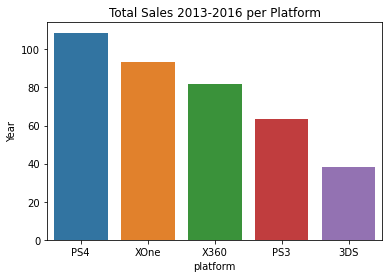

rating
M       165.21
N/A      89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64
genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Platform         18.14
Fighting         15.55
Racing           12.96
Adventure         7.14
Simulation        4.86
Strategy          3.28
Puzzle            0.83
Name: na_sales, dtype: float64


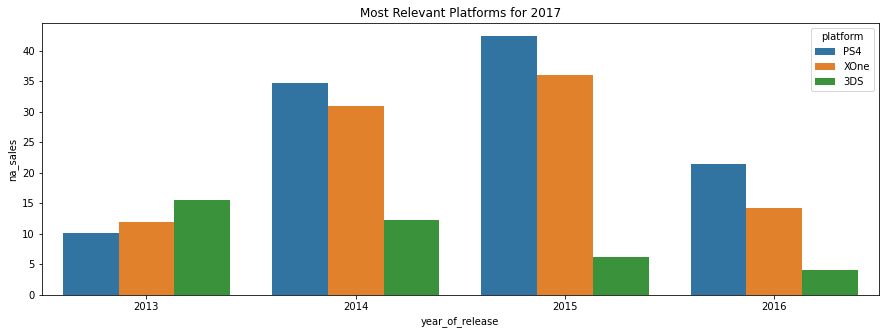

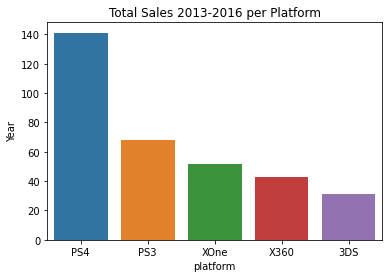

rating
M       145.32
E        83.36
N/A      78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64
genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Misc             20.04
Platform         15.58
Simulation       10.92
Fighting          8.55
Adventure         8.25
Strategy          4.22
Puzzle            1.00
Name: eu_sales, dtype: float64


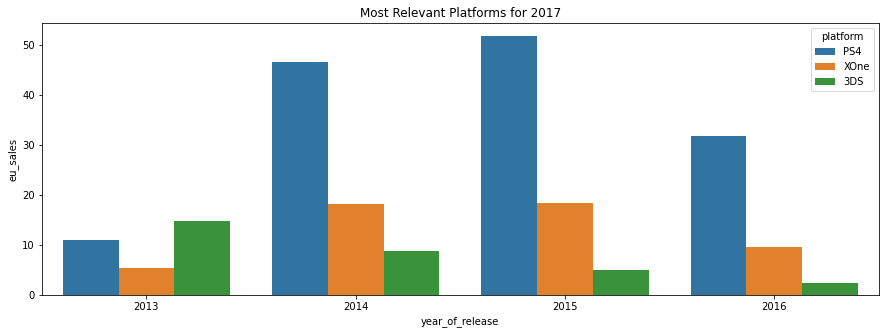

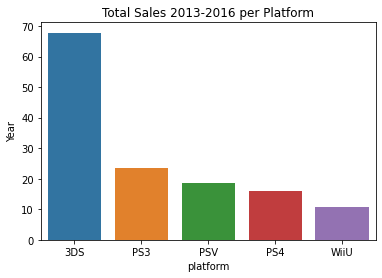

rating
N/A     85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64
genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Adventure        5.82
Sports           5.41
Platform         4.79
Simulation       4.52
Racing           2.30
Strategy         1.77
Puzzle           1.18
Name: jp_sales, dtype: float64


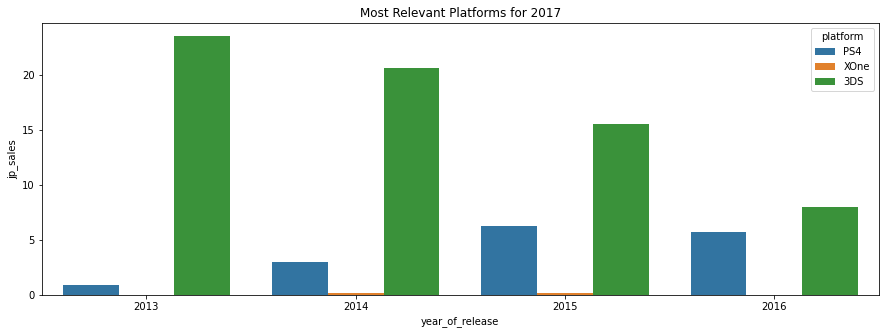

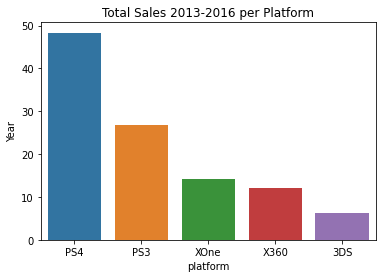

rating
M       47.04
N/A     23.46
E       22.61
T       14.29
E10+    12.57
Name: other_sales, dtype: float64
genre
Action          37.20
Shooter         28.77
Sports          19.45
Role-Playing    11.48
Misc             6.09
Racing           4.44
Platform         4.12
Fighting         3.56
Adventure        2.43
Simulation       1.46
Strategy         0.81
Puzzle           0.16
Name: other_sales, dtype: float64


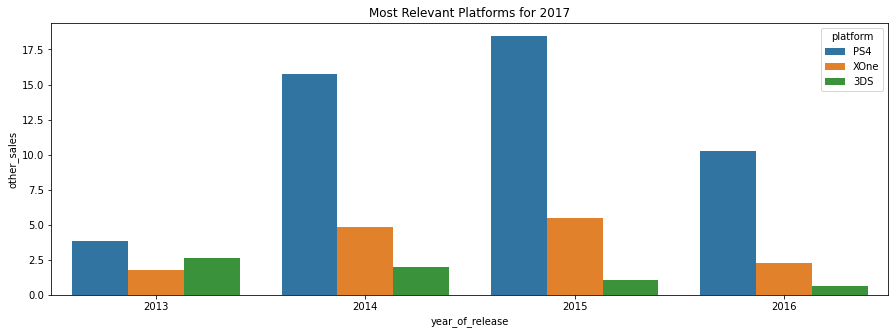

In [79]:
def plot_sales_by_region(df, sales_column, top_n_platforms):
    df_sales = df.groupby(['platform'])[sales_column].sum().sort_values(ascending=False)
    top_platforms = df_sales.head(top_n_platforms).reset_index()
    sns.barplot(x="platform", y=sales_column, data=top_platforms)
    plt.title('Total Sales 2013-2016 per Platform')
    plt.ylabel('Year')
    plt.show()
    
    sales_by_rating = df.groupby('rating')[sales_column].sum()
    print(sales_by_rating.sort_values(ascending=False))
    
    df_genre_sales = df.groupby('genre')[sales_column].sum().sort_values(ascending=False)
    print(df_genre_sales)
    df_genre_sales_mean = df.groupby('genre')[sales_column].mean()
    df_genre_sales_mean.sort_values(ascending=False)

    df_platform_year_sales = df.groupby(['platform','year_of_release'])[sales_column].sum()

    region_other_platforms = df_platform_year_sales.reset_index()

    promising_platforms_ps4 = region_other_platforms[region_other_platforms['platform'] == 'PS4']
    promising_platform_XboxOne = region_other_platforms[region_other_platforms['platform'] == 'XOne']
    promising_platform_3DS = region_other_platforms[region_other_platforms['platform'] == '3DS']


    promise_df = pd.concat([promising_platforms_ps4, promising_platform_XboxOne, promising_platform_3DS], axis=0)

    plt.figure(figsize=(15, 5))

    sns.barplot(data=promise_df, #dataset
                 x='year_of_release', #variable along the x-axis
                 y=sales_column, #variable along the y-axis (usually the thing you are actually measuring)
                hue = 'platform' #the variable you want to group data by to compare (ex. gender, country, plan)

               )
    plt.title('Most Relevant Platforms for 2017')
    plt.show()

# Example usage:
plot_sales_by_region(video_games_df_relevant, "na_sales", 5)
plot_sales_by_region(video_games_df_relevant, "eu_sales", 5)
plot_sales_by_region(video_games_df_relevant, "jp_sales", 5)
plot_sales_by_region(video_games_df_relevant, "other_sales", 5)


It looks like the most popular platform is the Playstation 4.
The most popular genres are shooters and action. 
The most popular ESRB is M for mature. 

The main difference between all these regions are Japan. Japan loves their Nintendo Platforms and the 3DS. This is probaly why their most popular ESRB rating is T and E. Pokemon, Super Mario Bros, Legend of Zelda, and more. These are all rated E and T and are Nintendo exclusives. 

The reason why Japan has no many ESRB ratings missing from the data is because ESRB iss the organization responsible for rating video games in North America, while Japan has a different rating system. ESRB rating is voluntary, and it may not be required for games sold in Japan.

Japan has a self-regulatory system for video game content rating, which is called Computer Entertainment Rating Organization (CERO) that was established in 2002 by the Computer Entertainment Supplier's Association (CESA), Japan's video game industry trade group. Therefore, it's quite common for games in Japan to be released without an ESRB rating, as it may not be required.

In [80]:
# Average user ratings of the Xbox One and PC platforms are the same.
xbox_one_data = video_games_df_relevant[video_games_df_relevant['platform'] == 'XOne']
pc_data = video_games_df_relevant[video_games_df_relevant['platform'] == 'PC']


xbox_one_ratings = xbox_one_data['user_score']
pc_ratings = pc_data['user_score']


t_stat, p_value = stats.ttest_ind(xbox_one_ratings, pc_ratings)
print(p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

0.20111399900783614
Fail to reject the null hypothesis


True. The average user rating for PC and Xbox One are the same

In [81]:
# Average user ratings of the Action and Sports genre are different
action_data = video_games_df_relevant[video_games_df_relevant['genre'] == 'Action']
sports_data = video_games_df_relevant[video_games_df_relevant['genre'] == 'Sports']

action_ratings = action_data['user_score']
sports_ratings = sports_data['user_score']

t_stat, p_value = stats.ttest_ind(action_ratings, sports_ratings)
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

0.02193663336455412
Reject the null hypothesis


True. The average user rating for Action and Sports are different.

For the first hypothesis, the null hypothesis is that the means of the two samples are equal, and the alternative hypothesis is that the means of the two samples are different.

Null hypothesis (H0): The mean user rating for the Xbox One platform is equal to the mean user rating for the PC platform.
Alternative hypothesis (H1): The mean user rating for the Xbox One platform is not equal to the mean user rating for the PC platform.

For the second hypothesis (that the average user ratings for the Action and Sports genres are different), the null and alternative hypotheses can be formulated as follows:

Null hypothesis (H0): The average user ratings for the Action and Sports genres are equal.
Alternative hypothesis (H1): The mean user rating for the Action genre is different to the mean user rating for the Sports genre.

The significance level is the probability of rejecting the null hypothesis when it is true. In this case, I have chosen a significance level of 0.05 (alpha = 0.05). This means that there is a 5% chance of rejecting the null hypothesis when it is true. I chose this significance level because it is a commonly used value that provides a good balance between the risk of making a Type I error and the power of the test (the probability of rejecting the null hypothesis when it is false). If the p-value is greater than or equal to 0.05, we will fail to reject the null hypothesis and conclude that there is not




# Conclusion 

I have come to fine that majority of the sales are coming from the Playstation Platforms (PS, PS2, PS3, and PS4). I would continue to advetise for the PS4, as it is the newest generation console and the most popular out of its competitors. I would also reccomend advertising for Xbox One and the Nintendo 3DS. 

Based on the reviews, we found that critic scores are much stronger of a postive correlation than compared to user reviews. 
The only time there was anegative correlation was user reviews for the Xbox One and PS4. This could be because of larger social media presence revolving these paltforms. Although, none of the correlations are extremely strong. 

Based on genre, I would focus advertisements on Action and Shooter games. These have become very popular within the recent years due to major games like Call of Duty and Battlefield. Other genres I would focus on are Sports and Roleplaying. 

Based on ESRB ratings, you will most likely have to advertise for M games. This is probably because of the popularity revolving shooter and action games in each region. 

Platforms: PS4, Xbox One, and 3DS
Genres: Shooters, Role-Playing, Sports, and Action
Ratings: M for mature, T for Teen, and E for everyone. 

